# Plotting intrinsic properties all human data

In [1]:
import funcs_plot_intrinsic_props as pl_intr
import funcs_for_results_tables as get_results
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import numpy as np
import math

/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/detect_peaks.py:11: UserWarning: A newest version is available at https://pypi.org/project/detecta/
  warnings.warn('A newest version is available at https://pypi.org/project/detecta/')


In [2]:
df_intr_props = get_results.collect_intrinsic_df()

adult_df = pl_intr.filter_adult_hrs_incubation_data(df_intr_props, min_age = 15, hrs_inc = 18, max_age = 151) # QC criteria 

# adult_df = adult_df.replace({'high K concentration': '8 mM'}, 0)
# adult_df = adult_df.replace({'high K concentration': '15 mM'}, 1)

adult_df_slice_comparison = adult_df.loc[adult_df['repatch'] == 'no']
adult_df_repatch = pl_intr.get_repatch_df(adult_df)
adult_repatch_norm = pl_intr.get_normalized_df(adult_df_repatch)

adult_df_3h = pl_intr.filter_adult_hrs_incubation_data(df_intr_props, min_age = 15, hrs_inc = 0, max_age = 151) # QC criteria 
adult_df_slice_comparison_3h = adult_df.loc[adult_df['repatch'] == 'no']
adult_df_repatch_3h = pl_intr.get_repatch_df(adult_df)
adult_repatch_norm_3h = pl_intr.get_normalized_df(adult_df_repatch)


#do the same for the juv data
# juv_df = pl_intr.filter_adult_hrs_incubation_data(df_intr_props, min_age = 0, hrs_inc = 18, max_age = 18) # QC criteria 
# juv_df = juv_df.replace({'high K concentration': '8 mM'}, 0)
# juv_df = juv_df.replace({'high K concentration': '15 mM'}, 1)

# juv_df_slice_comparison = juv_df.loc[juv_df['repatch'] == 'no']
# juv_repatch = pl_intr.get_repatch_df(juv_df)
# juv_repatch_norm = pl_intr.get_normalized_df(juv_repatch)


/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/plot_intrinsic_props.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cell_ID_new'] = cell_IDs_new
/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/plot_intrinsic_props.py:132: RuntimeWarning: invalid value encountered in true_divide
  d1 = ((sorted_D1[col].values - sorted_D1[col].values)/sorted_D1[col].values)*100
/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/plot_intrinsic_props.py:133: RuntimeWarning: divide by zero encountered in true_divide
  d2 = ((sorted_D2[col].values - sorted_D1[col].values)/sorted_D1[col].values)*100
/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/plot_intrinsic_props.py:13

In [63]:
# print(len(df_intr_props))
# print(len(adult_df))
# print(len(adult_df_repatch))
# print(len(adult_df_slice_comparison))
# print(len(adult_df_repatch)+ len(adult_df_slice_comparison))
# print(len(adult_df[adult_df['repatch'] == 'yes']))

len(adult_df_slice_comparison) # 146 and 354

354

In [4]:

# missing_cell_ids = []
# [missing_cell_ids.append(cell_id) for cell_id in adult_df['cell_ID'][adult_df['repatch'] == 'yes'].tolist() if cell_id not in adult_df_repatch['cell_ID'].tolist()]
# #len(missing_cell_ids)
# #adult_df['cell_ID'].isnull().any()
# sorted(missing_cell_ids)

In [5]:
exp_overview = pd.read_excel('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/2023-09-20_experiments_overview.xlsx')
df_op_info = pd.DataFrame(columns = ['OP', 'patient_age', 'resected area'])


for OP in df_intr_props['OP'].unique():
    OP = df_intr_props['OP'].loc[df_intr_props['OP'] == OP].to_list()[0]
    area = exp_overview['region'].loc[exp_overview['OP'] == OP].to_list()[0]
    patient_age = df_intr_props['patient_age'].loc[df_intr_props['OP'] == OP].tolist()[0]
    df_op_add = pd.DataFrame({'OP':OP, 'patient_age':[patient_age], 'resected area':area})
    df_op_info = pd.concat([df_op_info.loc[:], df_op_add]).reset_index(drop=True)
    


In [6]:
params = ['Rin', 'resting_potential', 'membra_time_constant_tau', 'TH', 'capacitance']
scales = [[50, 100, 150, 200, 250], [-80, -70, -60, -50],[5, 10, 15, 20, 25], [-45, -40, -30, -35, -25], [100, 300, 500, 700]]

df = adult_df_slice_comparison
data_type = 'slice_adult'

save_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/plots/intrinsic/'

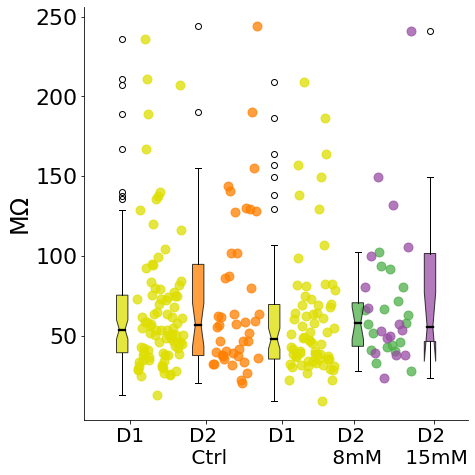

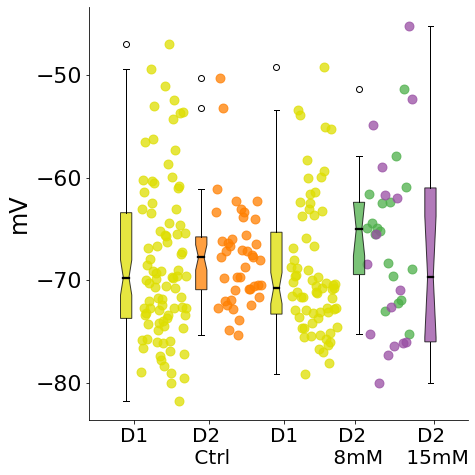

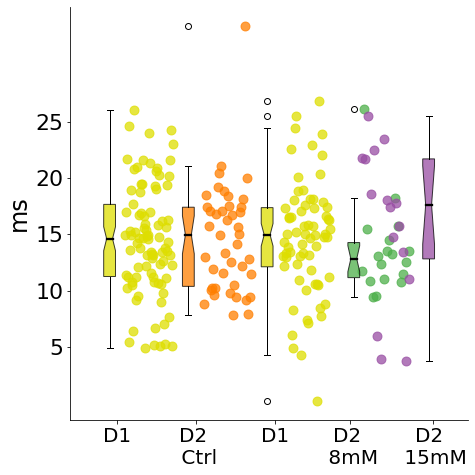

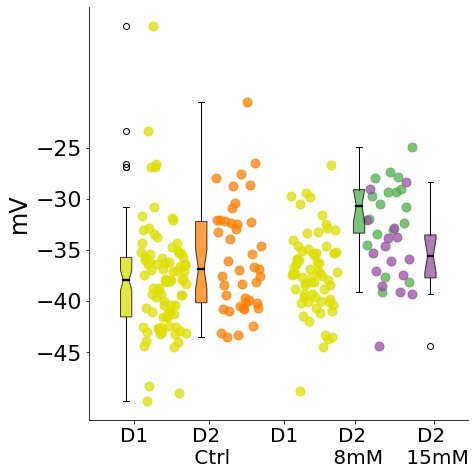

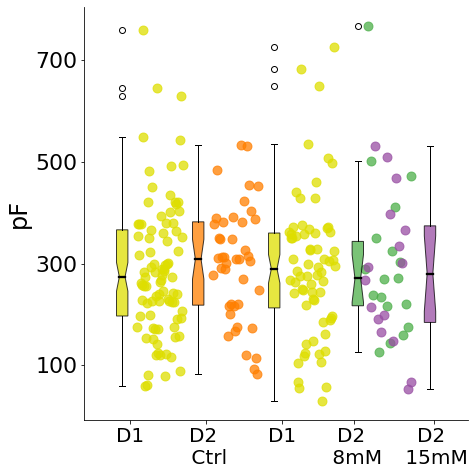

In [7]:
 treatments = ['Ctrl', 'high K']

titles_dict = pl_intr.dict_for_plotting()

if 'norm' in data_type:
    titles_dict_norm = {}
    for (key, value) in titles_dict.items():
        titles_dict_norm[key + '_norm'] = value
    titles_dict = titles_dict_norm
    
colors = ['#dede00', '#ff7f00', '#dede00', '#4daf4a','#dede00','#984ea3'] #Ctrl, 8mM Kcl, 15 mM Kcl

cmap = plt.cm.get_cmap('tab20')
op_color_dict = {}
OP_list = sorted(list(df['OP'].unique()))
for h, op in enumerate(OP_list):
    op_color_dict[op] = cmap((h+1)/10)

for u, param in enumerate(params): #titles_dict.keys(): 
    fig2 = plt.figure(figsize=(7,7))
    ax = plt.subplot(1,1,1)
    day_label = []
    num_cels = {}
    data_boxplot = []
    for i, tr in enumerate(treatments):
        x_plot =[]
        for j, day in enumerate(df['day'].unique()):
            k = j + 2*i 
            df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
            median = df_plot[param].median()
            #x = np.linspace(0.8+k, 1.35+k, len(plot_df))
            x = np.linspace(0.7+k, 1.3+k, len(df_plot))
            x_plot.append(x)
            if tr == 'high K' and day == 'D2':
                #ax.scatter(x, df_plot[param], alpha = 0.7, s = 40, c = df_plot['high K concentration'], cmap = colormap_K)
                y_8mm = df_plot[param].loc[df_plot['high K concentration'] == '8 mM'] 
                x_8 = np.linspace(0.7+k, 1.3+k, len(y_8mm))
                median_8 = np.median(y_8mm)
                y_15mm = df_plot[param].loc[df_plot['high K concentration'] == '15 mM'] 
                x_15 = np.linspace(0.7+k, 1.3+k, len(y_15mm))
                median_15 = np.median(y_15mm)
                ax.scatter(x_8, y_8mm, c = colors[3], s = 80, alpha = 0.75)
                ax.scatter(x_15, y_15mm, c = colors[5], s = 80, alpha = 0.75)
                ax.boxplot(y_8mm, positions = [k+0.6], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[3], alpha = 0.75),
                medianprops = dict(linewidth=2.3, color = 'k'))
                ax.boxplot(y_15mm, positions = [k+1.55], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[5], alpha = 0.75),
                medianprops = dict(linewidth=2.3, color = 'k'))
                # ax.text(1.7 + 2*i, int(np.max(df[param])-20), 'n = ' + str(len(y_8mm)), size = 17, c = colors[3])
                # ax.text(1.7 + 2*i, int(np.max(df[param])-20), 'n = ' + str(len(y_15mm)), size = 17, c = colors[5])


            else:
                ax.boxplot(df_plot[param], positions = [k + 0.5], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.75),
                medianprops = dict(linewidth=2.3, color = 'k'))    
                ax.scatter(x, df_plot[param], c = colors[int(k)], s = 80, alpha = 0.75)
            day_label.append(day)
            num_cels[tr + ' ' + day] = len(df_plot)
            data_boxplot.append(df_plot[param])
        # ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 22, c = colors[2*i+1])
        # ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = 17, c = colors[2*i+1])

    #plt.boxplot(data_boxplot, showbox = False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(axis='y', labelsize=22)
    ax.set_xticks(ticks = [0.6,1.6,2.6,3.55,4.6], labels = ['D1', 
    'D2 \n Ctrl', 'D1', 'D2 \n 8mM','D2 \n 15mM'], size = 20)
    #plt.title(titles_dict[param][0], fontsize = 20, x = 0.5, y = 1)
    ax.set_ylabel(titles_dict[param][1], fontsize = 24)
    ax.set_yticks(ticks = scales[u])

    plt.subplots_adjust(hspace=0.35)
    fig2.patch.set_facecolor('white')
    fig2.tight_layout()

    date = str(datetime.date.today())
    plt.savefig(save_dir + data_type + date + param + '_plot.pdf')
    #plt.close(fig2)


## REPATCH DATA

In [8]:
params_repatch = ['Rin', 'resting_potential', 'membra_time_constant_tau', 'TH', 'capacitance']
scales = [[50, 100, 150, 200, 250], [-80, -70, -60, -50],[5, 10, 15, 20, 25], [-45, -40, -30, -35, -25], [100, 300, 500, 700]]
df = adult_df_repatch
data_type = 'repatch_adult'


In [9]:
treatments = ['Ctrl', 'high K']
titles_dict = pl_intr.dict_for_plotting()

if 'norm' in data_type:
    titles_dict_norm = {}
    for (key, value) in titles_dict.items():
        titles_dict_norm[key + '_norm'] = value
    titles_dict = titles_dict_norm
    
colors = ['#dede00', '#ff7f00', '#dede00', '#4daf4a','#dede00','#984ea3'] #Ctrl, 8mM Kcl, 15 mM Kcl

cmap = plt.cm.get_cmap('tab20')
op_color_dict = {}
for h, op in enumerate(df['OP'].unique()):
    op_color_dict[op] = cmap((h+1)/10)

for u, param in enumerate(params_repatch): #titles_dict.keys(): 
    fig2 = plt.figure(figsize=(7,7))
    ax = plt.subplot(1,1,1)
    day_label = []
    num_cels = {}
    data_boxplot = []
    for i, tr in enumerate(treatments):
        x_plot =[]
        
        for j, day in enumerate(df['day'].unique()):
            k = j + 2*i 
            df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
            median = df_plot[param].median()
            #x = np.linspace(0.8+k, 1.35+k, len(plot_df))
            x = np.linspace(0.7+k, 1.3+k, len(df_plot))
            x_plot.append(x)
            if tr == 'high K' and day == 'D2':
                #ax.scatter(x, df_plot[param], alpha = 0.7, s = 40, c = df_plot['high K concentration'], cmap = colormap_K)
                y_8mm = df_plot[param].loc[df_plot['high K concentration'] == '8 mM'] 
                x_8 = np.linspace(0.7+k, 1.3+k, len(y_8mm))
                median_8 = np.median(y_8mm)
                y_15mm = df_plot[param].loc[df_plot['high K concentration'] == '15 mM'] 
                x_15 = np.linspace(0.7+k, 1.3+k, len(y_15mm))
                median_15 = np.median(y_15mm)
                ax.scatter(x_8, y_8mm, c = colors[3], s = 80)
                ax.scatter(x_15, y_15mm, c = colors[5], s = 80)
                # ax.boxplot(y_8mm, positions = [k+0.65], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[3], alpha = 0.75))
                # ax.boxplot(y_15mm, positions = [k+1.55], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[5], alpha = 0.75))
                ax.plot([0.75+k, 1+k], [median_8, median_8], c = 'k', linestyle = 'solid', linewidth = 1)
                ax.plot([1.2+k, 1.42+k], [median_15, median_15], c = 'k', linestyle = 'solid', linewidth = 1)
                ax.text(k+0.75, median_8 + 0.5, str(round(median_8, 2)), size = 17)
                ax.text(k+1.15, median_15 + 0.5, str(round(median_15, 2)), size = 17)
                #ax.scatter(x, y, alpha = 0.7, s = 40, c = plot_df['K_concentr_bool'], cmap = colormap_K)

            else:
                #ax.boxplot(df_plot[param], positions = [k + 0.5], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.5))
                
                ax.scatter(x, df_plot[param], c = colors[int(k)], s = 80)
                #ax.scatter(x, df_plot[param], alpha = 0.7, c = colors[int(k)], s = 40)
                yerr = 1.253*(df_plot[param].std()/(math.sqrt(len(df_plot))))
                ax.scatter(1+k, median, color = 'k', marker = '_', s = 2000)
                ax.text(0.9+k, (1.05*median), str(round(median,2)), size = 15)
            day_label.append(day)
            num_cels[tr + ' ' + day] = len(df_plot)
            data_boxplot.append(df_plot[param])
            #ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
            #ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot[param])), size = 12, c = colors[2*i+1])
 
        if k in [1,3,5] and 'repatch' in data_type:
            for c, cell in enumerate(df_plot['cell_ID_new']):
                x1 = [x_plot[0][c], x[c]] 
                y = df[param][df['cell_ID_new'] == cell]
                op = df_plot['OP'][df_plot['cell_ID_new'] == cell].tolist()[0]
                plt.plot(x1, y, '-', color = op_color_dict[op], alpha = 0.8, linewidth = 2, zorder = 0)

    #plt.boxplot(data_boxplot, showbox = False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    ax.tick_params(axis='y', labelsize=22) 
    ax.set_xticks(ticks = [0.6,1.6,2.6,3.55,4.6], labels = ['D1', 
    'D2 \n Ctrl', 'D1', 'D2 \n 8mM','D2 \n 15mM'], size = 20)
    ax.set_yticks(ticks = scales[u])
    #plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)
    ax.set_ylabel(titles_dict[param][1], fontsize = 24)
    #ax.set_xlabel('Day', fontsize = 15)

    fig2.patch.set_facecolor('white')
    fig2.tight_layout()


    date = str(datetime.date.today())
    plt.savefig(save_dir + data_type + date + param + '_repatch_plot.pdf')
    plt.close()



## REPATCH NORMALIZED

In [10]:
params_norm = ['Rin_norm', 'resting_potential_norm', 'membra_time_constant_tau_norm', 'TH_norm', 'capacitance_norm']
scales_norm = [[60, 100, 140, 180, 220], [80, 100, 120, 140, 160],[0, 100, 200, 300, 400, 500], 
[80, 100, 120, 140, 160], [0, 50, 100, 150, 200]]

df = adult_repatch_norm
data_type = 'norm_repatch_adult'


In [11]:
adult_repatch_norm = adult_repatch_norm.loc[adult_repatch_norm['capacitance_norm'] > -50]
adult_repatch_norm = adult_repatch_norm.loc[adult_repatch_norm['capacitance_norm'] < 1000]
adult_repatch_norm = adult_repatch_norm.loc[adult_repatch_norm['membra_time_constant_tau_norm'] < 2000]

df = adult_repatch_norm

In [12]:
treatments = ['Ctrl', 'high K']
titles_dict = pl_intr.dict_for_plotting()

if 'norm' in data_type:
    titles_dict_norm = {}
    for (key, value) in titles_dict.items():
        titles_dict_norm[key + '_norm'] = value
    titles_dict = titles_dict_norm
    
colors = ['moccasin', '#ff7f00', 'moccasin', '#4daf4a','moccasin','#984ea3'] #Ctrl, 8mM Kcl, 15 mM Kcl

cmap = plt.cm.get_cmap('tab20')
op_color_dict = {}
for h, op in enumerate(df['OP'].unique()):
    op_color_dict[op] = cmap((h+1)/10)

for u, param in enumerate(params_norm): #titles_dict.keys(): 
    fig2 = plt.figure(figsize=(4,7))
    ax = plt.subplot(1,1,1)
    day_label = []
    num_cels = {}
    data_boxplot = []
    for i, tr in enumerate(treatments):
        x_plot =[]
        for j, day in enumerate(df['day'].unique()):
            k = j + 2*i 
            df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
            median = df_plot[param].median()
            x = np.repeat((k + 0.5), len(df_plot))
            x_plot.append(x)
            ax.scatter(x, df_plot[param], alpha = 0.8, c = 'white', s = 40)  
            day_label.append(day)
            num_cels[tr + ' ' + day] = len(df_plot)
            data_boxplot.append(df_plot[param])
        #ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
        #ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = 12, c = colors[2*i+1])
        if k in [1,3,5] and 'repatch' in data_type:
            for c, cell in enumerate(df_plot['cell_ID_new']):
                x1 = [x_plot[0][c], x[c]] 
                y = df[param][df['cell_ID_new'] == cell]
                op = df_plot['OP'][df_plot['cell_ID_new'] == cell].tolist()[0]
                plt.plot(x1, y, '-', color = op_color_dict[op], alpha = 0.9, linewidth = 2)

    #plt.boxplot(data_boxplot, showbox = False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.set_xticks(ticks = list(range(1,5)), labels = day_label, fontsize = 17) 
    ax.tick_params(axis='y', labelsize=22)
    ax.set_xticks(ticks = [0.5,1.5,2.5,3.5], labels = ['D1', 
    'D2 \n Ctrl', 'D1', 'D2 \n high K'], size = 20)
    #plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)
    ax.set_ylabel('norm. % difference \n (D1-D2)/D1', fontsize = 24)
    #ax.set_yticks(ticks = scales_norm[u])

    plt.subplots_adjust(hspace=0.35)
    fig2.patch.set_facecolor('white')
    fig2.tight_layout()

    date = str(datetime.date.today())
    plt.savefig(save_dir + data_type + date + param + '_repatch_norm_plot.pdf')
    plt.close(fig2)


# IFF for each slice 

In [13]:
import plot_intrinsic_props as pl_intr
import funcs_for_results_tables as get_results
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import numpy as np
import seaborn as sns

def get_precise_treatment(df):
    high_K_concentr = df['high K concentration'].tolist()
    tr_precise = []
    for i, tr in enumerate(df['treatment']):
        if tr == 'Ctrl':
            tr_precise.append(tr)
        else:
            tr_precise.append(high_K_concentr[i])
    df['treatment'] = tr_precise
    return df

In [14]:
IFF_collected = get_results.collect_IFF_dfs(human_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/')

# df_intr_props = get_results.collect_intrinsic_df()
# adult_df = pl_intr.filter_adult_hrs_incubation_data(df_intr_props, min_age = 18, hrs_inc = 18, max_age = 151) # QC criteria 
adult_df = pl_intr.create_new_cell_IDs(adult_df)

IFF_QC, IFF_repatch = pl_intr.get_QC_for_IFF_df(adult_df, IFF_collected) 

IFF_QC = pl_intr.remove_non_firing_cells_D1(IFF_QC)
IFF_QC = IFF_QC.loc[IFF_QC['treatment'] != 'TTX']
IFF_QC_slice = IFF_QC.loc[IFF_QC['repatch'] == 'no']
IFF_QC_slice_firing = pl_intr.remove_non_firing_cells_D1(IFF_QC_slice)
IFF_QC_slice_firing = get_precise_treatment(IFF_QC_slice_firing)

IFF_repatch_firing = pl_intr.remove_non_firing_cells_D1(IFF_repatch)
IFF_repatch_firing = IFF_repatch_firing.loc[IFF_repatch_firing['treatment'] != 'TTX']
IFF_repatch_firing = get_precise_treatment(IFF_repatch_firing)


/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/funcs_for_results_tables.py:802: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IFF_all['treatment'].loc[IFF_all['treatment'] == 'high k'] = 'high K'
/var/folders/5y/f01m99kn5tx3chk04wp6sc440000gn/T/ipykernel_17510/2498749091.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['treatment'] = tr_precise


In [18]:
# pl_intr.plot_IFF_avg_against_current_inj(IFF_QC_slice_firing , 'slice', 'IFF')
# pl_intr.plot_IFF_avg_against_current_inj(IFF_repatch_firing, 'repatch', 'IFF')

IFF_df =  IFF_QC_slice_firing #IFF_repatch_firing
data_type = 'all' # 'all'
DV = 'IFF' 

#destination_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/plots/IFF/'

In [81]:
IFF_QC_slice_firing.to_csv('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/data_tables/IFF_slice.csv')
IFF_repatch_firing.to_csv('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/data_tables/IFF_repatch.csv')

In [19]:

num_aps_indx, IFF_indx = pl_intr.get_num_aps_and_IFF_data_culumns(IFF_df)
treatments = ['Ctrl', '8 mM', '15 mM']
date = str(datetime.date.today())
destination_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/plots/IFF/'

colors_dict = {'D1' : ['#dede00','#dede00','#dede00'], 'D2': ['#ff7f00', '#4daf4a','#984ea3']}
DV_dict = {'IFF' : [IFF_indx, 'Initial firing frequency (AP#1 to AP#2)',  'Instantaneous firing frequency (Hz)'], 
'num_aps' : [num_aps_indx, 'Number of fired action potentials', 'AP count']}

fig, ax = plt.subplots(1, len(treatments), figsize=(21,8), sharey = True)
#fig.subplots_adjust(hspace = 0.1)

for k, treatment in enumerate(treatments):
    tr_df = IFF_df[IFF_df['treatment'] == treatment]

    for day in tr_df['day'].unique():
        day_df = tr_df[tr_df['day'] == day]
        avgs, sems, inj = [], [], []
        for i, col in enumerate(DV_dict[DV][0][5:]):
            data = day_df.iloc[:,col]
            x = np.linspace(0.75+i, 1.25+i, len(data))
            ax[k].scatter(x, data, alpha = 0.7, s = 7, c = colors_dict[day][k])

            avg = np.mean(data)
            sem = np.std(data, ddof=1) / np.sqrt(np.size(data))

            #yerr = np.linspace((avg - sem), (avg + sem), 5) 
            ax[k].errorbar(i + 1, avg, yerr = sem)

            avgs.append(avg)
            sems.append(sem) #standard error of the mean
            inj.append(day_df.columns[col][2:(day_df.columns[col]).rfind('pA')])
        
        ax[k].scatter(range(1, len(inj)+1), avgs, label = day, color = colors_dict[day][k], s = 30)
        ax[k].plot(range(1, len(inj)+1), avgs, label = day, color = colors_dict[day][k])
        ax[k].errorbar(range(1, len(inj)+1), avgs, yerr = sem, label = day, color = colors_dict[day][k])

        ax[k].set_title(treatment + ' ' + data_type, fontsize = 25)
        ax[k].set_xlabel('Current (pA)', fontsize = 24)
        ax[0].set_ylabel(DV_dict[DV][2], fontsize = 24      )
        ax[k].set_xticks(ticks = list(range(1,22,2)), labels = [0,100,200,300,400,500,600,800,1000,1200,1400],
        fontsize = 22, rotation = 45) 
        max_val = max(tr_df.iloc[:,DV_dict[DV][0]].max(numeric_only = True))
        ax[k].set_yticks(ticks = [0,40,80, 120, 160, 200], fontsize = 22) 

        ax[k].tick_params(axis='y', labelsize = 22)
        ax[k].spines['top'].set_visible(False)
        ax[k].spines['right'].set_visible(False)

    #max_val = max(tr_df.max(numeric_only = True))
    if 'repatch' in data_type:
        ax[k].text(len(inj)-4, 200, 'n = ' + str(int(len(tr_df)/2)), size = 25, c = 'k')
    else: 
        ax[k].text(len(inj)-4, 200, 'n = ' + str(int(len(day_df))), size = 25, c = 'k')

        # add n numbers
        #ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = 10, c = colors[2*i+1])
#plt.figlegend(loc = 'upper right', bbox_to_anchor=(1, 1), fontsize = 25)
fig.patch.set_facecolor('white')
fig.suptitle(DV_dict[DV][1], size = 30)

fig.tight_layout()
plt.savefig(destination_dir + date + data_type + DV + '_vs_curernt_inj_plot.png')
plt.close(fig)
# plt.show()

# Plotting traces for poster

In [20]:
import os
import pandas as pd
from human_characterisation_functions import load_traces
import numpy as np
import matplotlib.pyplot as plt
import stimulation_windows_ms
import neo
import sorting_functions as sort

In [21]:
human_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/'
OP = 'OP220127'
patcher = 'Verji'

work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)

save_dir_traces = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/plots/trace_charact/'


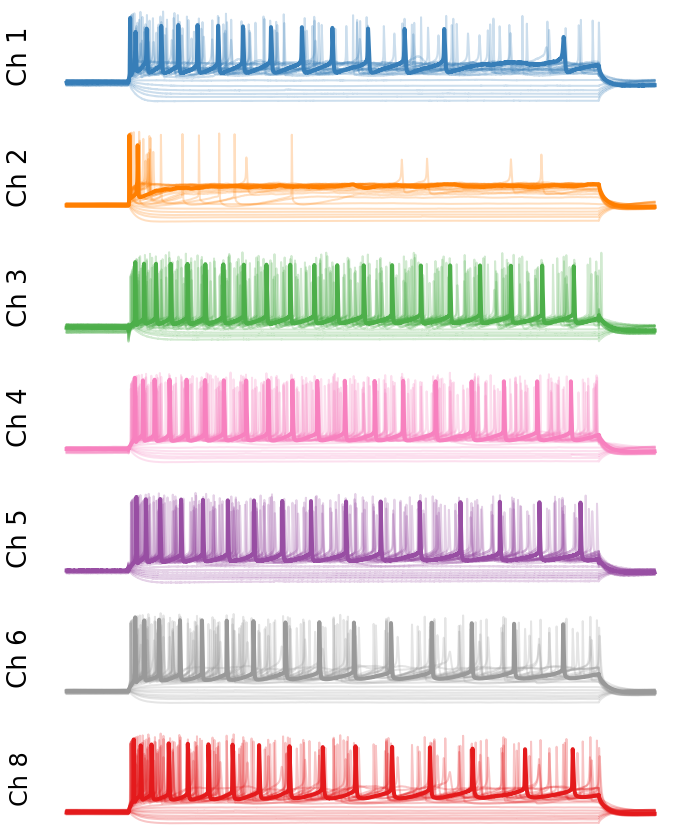

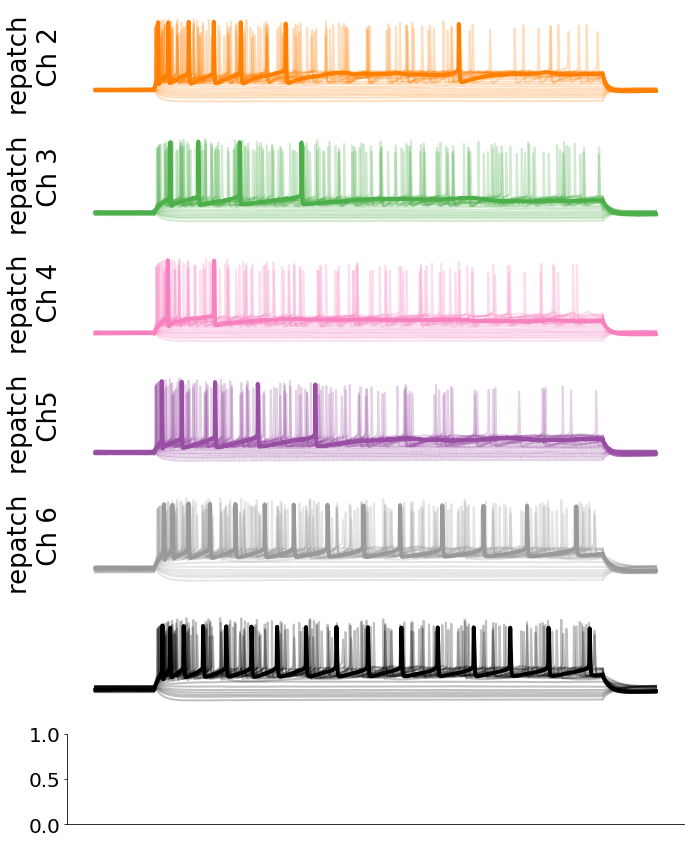

In [22]:
file_index = [18,51]
rheos = [450, 450]
active_channels = [[1,2,3,4,5,6,8], [2,3,4,5,6,7]]
y_labels_D2 = ['repatch \n Ch 2', 'repatch \n Ch 3', 
'repatch \n  Ch 4','repatch \n Ch5', 'repatch \n Ch 6', 'Ch 7']

inj=[-300,-200,-150,-100,-50,0,50,100,150,200,250,300,350,400,450,500,550,600,700,800,900,1000,1100,1200,1300,1400]
clrs = ['#377eb8', '#ff7f00', '#4daf4a',
        '#f781bf', '#984ea3','#999999', 
        '#e41a1c', '#dede00']
#match clrs for channels in 2 to be the same as repatched in 1
clrs2 = ['#ff7f00', '#4daf4a',
        '#f781bf', '#984ea3','#999999',
        'k']

#plot D1
fn = work_dir + filenames[file_index[0]]
x = len(active_channels[0])
fig, ax = plt.subplots(x,1,sharex=True, sharey=False,figsize=(10,12))
charact_data = load_traces(fn)

for i, ch in enumerate(active_channels[0][:-1]):
    key = 'Ch' + str(ch)
    ch1 = charact_data[key][0]

    ax[i].plot(ch1[0:25000,inj.index(rheos[0])], lw = 4, c=clrs[i]) 
    for h in range(25):
        ax[i].plot(ch1[0:25000,h], lw = 2, c=clrs[i], alpha = 0.25)
    ax[i].set_ylabel("Ch " + str(ch), fontsize = 26)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i+1].set_ylabel('Ch ' + str(active_channels[0][-1]), fontsize = 24)

ax[i+1].plot(ch1[0:25000,inj.index(600)], lw=4, c=clrs[i+1]) 
for k in range(25):
    ax[i+1].plot(ch1[0:25000,k], lw = 2, c=clrs[i+1], alpha = 0.25)
#ax[i+1].plot(ch1[0:25000,0], lw=3, c=clrs[i+1]) 
#ax[i+1].set_ylabel('Ch ' + str(active_channels[0][-1]), fontsize = 24)
ax[i+1].set_xticks([])
ax[i+1].set_yticks([])
ax[i+1].spines['top'].set_visible(False)
ax[i+1].spines['right'].set_visible(False)
ax[i+1].spines['bottom'].set_visible(False)
ax[i+1].spines['left'].set_visible(False)


#fig.suptitle('Day ' + str(0+1) + ',' + str(rheos[0])+'pA',fontsize=24)
fig.patch.set_facecolor('white')
fig.tight_layout()
#plt.show()
plt.savefig(save_dir_traces + 'day1.pdf', format = 'pdf')

#plt.close()

fn2 = work_dir + filenames[file_index[1]]
charact_data2 = load_traces(fn2)

fig2, ax = plt.subplots(x,1,sharex=True, sharey=False,figsize=(10,12))
for j, ch2 in enumerate(active_channels[1][:-1]):
    key = 'Ch' + str(ch2)
    ch1 = charact_data2[key][0]
    
    ax[j].plot(ch1[0:25000,inj.index(rheos[1])], lw = 4, c=clrs2[j]) 
    for k in range(25):
        ax[j].plot(ch1[0:25000,k], lw = 2, c=clrs2[j], alpha = 0.25)
    #ax[j].plot(ch1[0:25000,0], lw = 3, c=clrs2[j]) 
    ax[j].set_ylabel(y_labels_D2[j], fontsize = 26)
    ax[j].set_xticks([])
    ax[j].set_yticks([])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['bottom'].set_visible(False)
    ax[j].spines['left'].set_visible(False)

ax[j+1].plot(ch1[0:25000,inj.index(600)], lw=4, c=clrs2[j+1]) 
for k in range(25):
    ax[j+1].plot(ch1[0:25000,k], lw = 2, c=clrs2[j+1], alpha = 0.25)
#ax[j+1].plot(ch1[0:25000,0], lw=3, c=clrs2[j+1]) 
#ax[j+1].set_ylabel(y_labels_D2[j+1], fontsize = 24)
ax[j+1].set_xticks([])
ax[j+1].set_yticks([])
ax[j+1].spines['top'].set_visible(False)
ax[j+1].spines['right'].set_visible(False)
ax[j+1].spines['bottom'].set_visible(False)
ax[j+1].spines['left'].set_visible(False)

#fig2.suptitle('Day ' + str(1+1) + ',' + str(rheos[1])+'pA',fontsize=30)
fig2.patch.set_facecolor('white')
fig2.tight_layout()
#plt.show()
plt.savefig(save_dir_traces + 'day2.pdf', format = 'pdf')



# Plot spontan

In [77]:
import pandas as pd
import events_post_analysis_funcs as event_funcs
import plot_intrinsic_props as pl_intr
import datetime
import matplotlib.pyplot as plt
import numpy as np
import events_post_analysis_funcs as event_funcs
import funcs_for_results_tables as get_results
import human_characterisation_functions as hcf

results_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/meta_events/results/'
save_dir_spontan = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/plots/events/'



/var/folders/5y/f01m99kn5tx3chk04wp6sc440000gn/T/ipykernel_17510/4249162970.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QC['comment'].loc[mask] = None


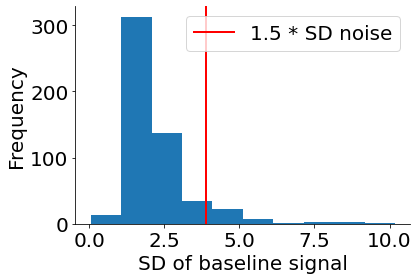

In [24]:
df_intr_props = get_results.collect_intrinsic_df()

adult_df = pl_intr.filter_adult_hrs_incubation_data(df_intr_props, min_age = 15, hrs_inc = 18, max_age = 151) # QC criteria 
adult_df = pl_intr.create_new_cell_IDs(adult_df)

spontan_df_orig = pd.read_excel(results_dir + 'spontan_all_2023-09-05.xlsx')

visual_QC_spontan = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/notes/analysis/events_detection/spontan_rough_evaluation_algorithm_all_results_01.02.2023.xlsx'
QC = pd.read_excel(visual_QC_spontan)

mask = QC['comment_elaboration'] == 'shifted events peaks'
QC['comment'].loc[mask] = None

spontan_df = event_funcs.post_event_analysis_main(QC, spontan_df_orig, 3) #min_event_size = 3, min_hrs = 20h
#n_nums_spontan_all = event_funcs.get_n_nums_per_day(spontan_df)
df = spontan_df
treatments = ['Ctrl', 'TTX', 'high K']
days = df['day'].unique() 

n_nums_dict = {}
for tr in treatments:
    for day in days:
        n_nums_dict[day + ' ' + tr] = len(df[(df['day'] == day) & (df['treatment'] == tr)])
n_nums_spontan_all = n_nums_dict

In [25]:
exp_overview = pd.read_excel('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/2023-09-20_experiments_overview.xlsx')

dict_higk_K_concentr = {}
for OP in spontan_df_orig['OP'].unique():
    K_concentr = exp_overview['K concentration'][exp_overview['OP'] == OP].tolist()[0]
    dict_higk_K_concentr[OP] = K_concentr

K_concentr_all = []
OP_list = spontan_df['OP'].tolist()
for i in range(len(spontan_df)):
    OP = OP_list[i]
    K_concentr_all.append(dict_higk_K_concentr[OP])

spontan_df['high K concentration'] = K_concentr_all
# spontan_df['K_concentr_bool'] = K_concentr_all

# spontan_df = spontan_df.replace({'K_concentr_bool': '8 mM'}, 0)
# spontan_df = spontan_df.replace({'K_concentr_bool': '15 mM'}, 1)



In [26]:
spontan_df, spontan_repatch = event_funcs.QC_spontan_with_intrinsic(adult_df, spontan_df)

In [83]:
spontan_df_slice = spontan_df.loc[spontan_df['repatch'] != 'yes']
#spontan_df_slice = spontan_df_slice.loc[spontan_df_slice['treatment'] != 'TTX']
spontan_df_slice.to_csv('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/data_tables/spontan_slice.csv')

In [28]:
#n_nums_slice = event_funcs.get_n_nums_per_day(spontan_df_slice)
df = spontan_df_slice
treatments = ['Ctrl', 'TTX', 'high K']
days = df['day'].unique() 

n_nums_dict = {}
for tr in treatments:
    for day in days:
        n_nums_dict[day + ' ' + tr] = len(df[(df['day'] == day) & (df['treatment'] == tr)])
n_nums_slice = n_nums_dict
n_nums_slice

{'D1 Ctrl': 52,
 'D2 Ctrl': 25,
 'D1 TTX': 39,
 'D2 TTX': 31,
 'D1 high K': 41,
 'D2 high K': 15}

In [29]:
df = spontan_df_slice
n_nums = n_nums_slice
data_type = 'spontan'

param_s = 'Average amplitude (pA)'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


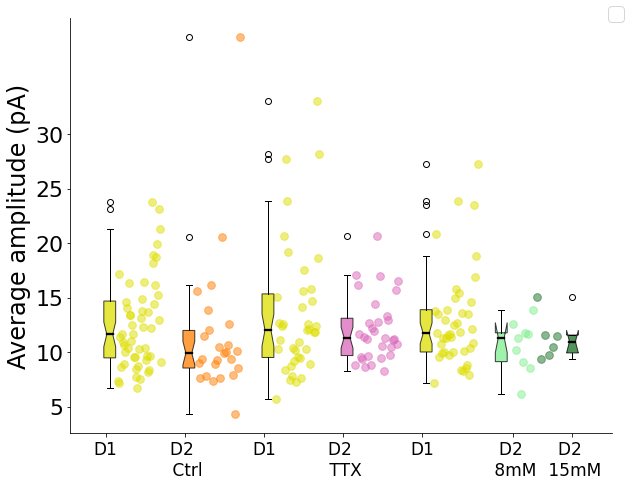

In [32]:
colors = ['#dede00', '#ff7f00', '#dede00', '#DA67BA', '#dede00', '#7FEE8F','#dede00','#186F25'] #Ctrl, TTX, 8mM Kcl, 15 mM Kcl
title1 = 'Spontaneous EPSCs in slice'

cmap = plt.cm.get_cmap('tab20')
op_color_dict = {}
for h, op in enumerate(df['OP'].unique()):
    op_color_dict[op] = cmap((h+1)/10)

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(1,1,1)
day_label = []

min_h_incubation = str(min(df['hrs_incubation']))
min_amplitude = str(min(df[param_s]))[:4]
x_plot = []
for i, comb in enumerate(n_nums.keys()):
    k = 0 + i
    day = comb[:2]
    treatment = comb[3:]
    plot_df = df[(df['treatment'] == treatment) & (df['day'] == day)]
    x = np.linspace(0.8+k, 1.35+k, len(plot_df))
    x_plot.append(x)
    y = plot_df[param_s]
    median = np.median(y)
    if treatment == 'high K' and day == 'D2':   
        y_8mm = plot_df[param_s].loc[plot_df['high K concentration'] == '8 mM'] 
        x_8 = np.linspace(0.8+k, 1.05+k, len(y_8mm))
        median_8 = np.median(y_8mm)
        y_15mm = plot_df[param_s].loc[plot_df['high K concentration'] == '15 mM'] 
        x_15 = np.linspace(1.10+k, 1.35+k, len(y_15mm))
        median_15 = np.median(y_15mm)
        ax.scatter(x_8, y_8mm, alpha = 0.5, c = colors[5], s = 60)
        ax.scatter(x_15, y_15mm, alpha = 0.5, c = colors[7], s = 60)
        ax.boxplot(y_8mm, positions = [k+0.65], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[5], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        ax.boxplot(y_15mm, positions = [k+1.55], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[7], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        #ax.plot([0.75+k, 1+k], [median_8, median_8], c = 'k', linestyle = 'solid', linewidth = 1)
        #ax.plot([1.2+k, 1.42+k], [median_15, median_15], c = 'k', linestyle = 'solid', linewidth = 1)
        #ax.text(k+0.75, median_8 + 0.5, str(round(median_8, 2)), size = 15)
        #ax.text(k+1.15, median_15 + 0.5, str(round(median_15, 2)), size = 15)
        #ax.scatter(x, y, alpha = 0.7, s = 40, c = plot_df['K_concentr_bool'], cmap = colormap_K)
    else:
        ax.boxplot(y, positions = [k + 0.7], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        y = plot_df[param_s]
        ax.scatter(x, y, alpha = 0.5, c = colors[k], s = 60)
        #ax.plot([0.9+k, 1.1+k], [median, median], c = 'k', linestyle = 'solid', linewidth = 1)
        #ax.text(k+0.85, median + 0.5, str(round(median, 2)), size = 15)
    day_label.append(comb)


#ax.boxplot([[1,4],[2,5],[3,6]], positions=[2,4,5.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xticks(ticks = [0.65,1.65,2.65,3.65,4.55], labels = ['D1', 
# 'D2 \n Ctrl', 'D1', 'D2 \n 8 mM','D2 \n 15 mM'], size = 20)
ax.set_xticks(ticks = [0.65, 1.65, 2.65, 3.65, 4.65, 5.8, 6.55], labels = ['D1', 
'D2 \n Ctrl', 'D1', 'D2 \n TTX','D1', 'D2 \n 8mM','D2 \n 15mM'], size = 17)
ax.set_yticks([5,10, 15,20,25,30])
ax.tick_params(axis='y', labelsize=22)

#plt.title(title1, fontsize = 19, x = 0.5, y = 1)
#ax.set_xlabel('Condition', fontsize = 15)
ax.set_ylabel(param_s, fontsize = 24)

plt.figlegend(loc = 'upper right',  bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig(save_dir_spontan + 'spontan_amp_slice_september_2023.pdf')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


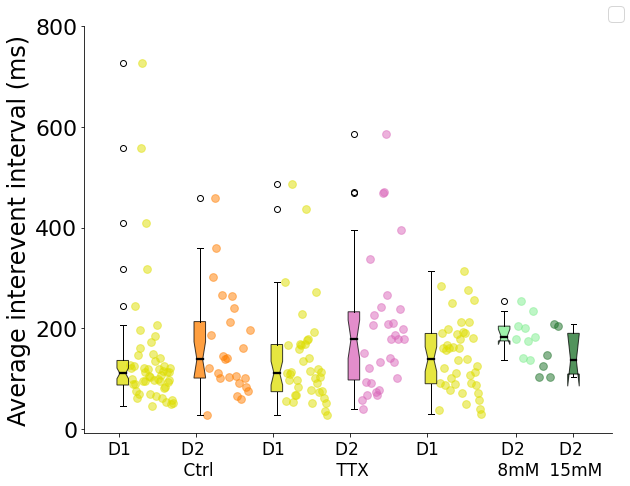

In [31]:
colors = ['#dede00', '#ff7f00', '#dede00', '#DA67BA', '#dede00', '#7FEE8F','#dede00','#186F25'] #Ctrl, TTX, 8mM Kcl, 15 mM Kcl
title1 = 'Spontaneous EPSCs in slice'

cmap = plt.cm.get_cmap('tab20')
op_color_dict = {}
for h, op in enumerate(df['OP'].unique()):
    op_color_dict[op] = cmap((h+1)/10)

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(1,1,1)
day_label = []

min_h_incubation = str(min(df['hrs_incubation']))
min_amplitude = str(min(df['Average interevent interval (ms)']))[:4]
x_plot = []
for i, comb in enumerate(n_nums.keys()):
    k = 0 + i
    day = comb[:2]
    treatment = comb[3:]
    plot_df = df[(df['treatment'] == treatment) & (df['day'] == day)]
    x = np.linspace(0.8+k, 1.35+k, len(plot_df))
    x_plot.append(x)
    y = plot_df['Average interevent interval (ms)']
    median = np.median(y)
    if treatment == 'high K' and day == 'D2':   
        y_8mm = plot_df['Average interevent interval (ms)'].loc[plot_df['high K concentration'] == '8 mM'] 
        x_8 = np.linspace(0.8+k, 1.05+k, len(y_8mm))
        median_8 = np.median(y_8mm)
        y_15mm = plot_df['Average interevent interval (ms)'].loc[plot_df['high K concentration'] == '15 mM'] 
        x_15 = np.linspace(1.10+k, 1.35+k, len(y_15mm))
        median_15 = np.median(y_15mm)
        ax.scatter(x_8, y_8mm, alpha = 0.5, c = colors[5], s = 60)
        ax.scatter(x_15, y_15mm, alpha = 0.5, c = colors[7], s = 60)
        ax.boxplot(y_8mm, positions = [k+0.65], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[5], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        ax.boxplot(y_15mm, positions = [k+1.55], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[7], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        #ax.plot([0.75+k, 1+k], [median_8, median_8], c = 'k', linestyle = 'solid', linewidth = 1)
        #ax.plot([1.2+k, 1.42+k], [median_15, median_15], c = 'k', linestyle = 'solid', linewidth = 1)
        #ax.text(k+0.75, median_8 + 0.5, str(round(median_8, 2)), size = 15)
        #ax.text(k+1.15, median_15 + 0.5, str(round(median_15, 2)), size = 15)
        #ax.scatter(x, y, alpha = 0.7, s = 40, c = plot_df['K_concentr_bool'], cmap = colormap_K)
    else:
        ax.boxplot(y, positions = [k + 0.7], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        y = plot_df['Average interevent interval (ms)']
        ax.scatter(x, y, alpha = 0.5, c = colors[k], s = 60)
        #ax.plot([0.9+k, 1.1+k], [median, median], c = 'k', linestyle = 'solid', linewidth = 1)
        #ax.text(k+0.85, median + 0.5, str(round(median, 2)), size = 15)
    day_label.append(comb)
    #ax.text(k+0.63, int(np.max(df['Average amplitude (pA)'])+1), 'n = ' + str(len(y_8mm)), size = 20, color = '#dede00')
    # if k in [1,3,5] and data_type == 'repatch':
    #     for c, cell in enumerate(plot_df['cell_ID']):
    #         x1 = [x_plot[0][c], x[c]] 
    #         y = df['Average amplitude (pA)'][df['cell_ID'] == cell]
    #         op = plot_df['OP'][plot_df['cell_ID'] == cell].tolist()[0]
    #         plt.plot(x1, y, '-', color = op_color_dict[op], alpha = 0.5, label = op)
    #     title1 = 'Spontaneous EPSCs (repatch)'
    #     x_plot = []

#ax.boxplot([[1,4],[2,5],[3,6]], positions=[2,4,5.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.set_yticks([0,200, 400,600,800])
ax.tick_params(axis='y', labelsize=22)

#plt.title(title1, fontsize = 19, x = 0.5, y = 1)
#ax.set_xlabel('Condition', fontsize = 15)
ax.set_ylabel('Average interevent interval (ms)', fontsize = 24)
ax.set_xticks(ticks = [0.65, 1.65, 2.65, 3.65, 4.65, 5.8, 6.55], labels = ['D1', 
'D2 \n Ctrl', 'D1', 'D2 \n TTX','D1', 'D2 \n 8mM','D2 \n 15mM'], size = 17)
plt.figlegend(loc = 'upper right',  bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig(save_dir_spontan + 'spontan_IEE_slice_september_2023.pdf')


### Plot spontan repatch

In [40]:
#spontan_repatch = spontan_repatch.loc[spontan_repatch['treatment'] != 'TTX']
#n_nums_repatch = event_funcs.get_n_nums_per_day(spontan_repatch)
# n_nums_repatch = {'D1 Ctrl': 4,
#  'D2 Ctrl': 4,
#  'D1 high K': 8,
#  'D2 high K': 8}


In [33]:
spontan_repatch_filtered = pl_intr.get_repatch_df(spontan_repatch)

#n_nums_repatch = event_funcs.get_n_nums_per_day(spontan_repatch_filtered)
df  = spontan_repatch_filtered
n_nums_dict = {}
for tr in treatments:
    for day in days:
        n_nums_dict[day + ' ' + tr] = len(df[(df['day'] == day) & (df['treatment'] == tr)])
n_nums_repatch = n_nums_dict
n_nums_repatch


{'D1 Ctrl': 6,
 'D2 Ctrl': 6,
 'D1 TTX': 12,
 'D2 TTX': 12,
 'D1 high K': 9,
 'D2 high K': 9}

In [82]:
df = spontan_repatch_filtered
n_nums = n_nums_repatch
data_type = 'repatch'

spontan_repatch_filtered.to_csv('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/data_tables/repatch_spontan.csv')

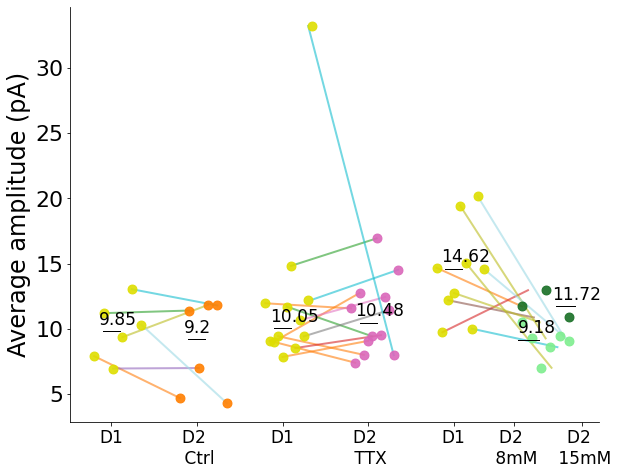

In [78]:

colors = ['#dede00', '#ff7f00', '#dede00', '#DA67BA', '#dede00', '#7FEE8F','#dede00','#186F25'] #Ctrl, TTX, 8mM Kcl, 15 mM Kcl

op_color_dict = {}
for h, op in enumerate(df['OP'].unique()):
    op_color_dict[op] = cmap((h+1)/10)

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(1,1,1)
day_label = []

min_h_incubation = str(min(df['hrs_incubation']))
min_amplitude = str(min(df['Average amplitude (pA)']))[:4]
x_plot = []
for i, comb in enumerate(n_nums.keys()):
    k = 0 + i
    day = comb[:2]
    treatment = comb[3:]
    plot_df = df[(df['treatment'] == treatment) & (df['day'] == day)]
    x = np.linspace(0.8+k, 1.35+k, len(plot_df))
    x_plot.append(x)
    y = plot_df['Average amplitude (pA)']
    median = np.median(y)
    if treatment == 'high K' and day == 'D2':   
        y_8mm = plot_df['Average amplitude (pA)'].loc[plot_df['high K concentration'] == '8 mM'] 
        x_8 = np.linspace(0.8+k, 1.35+k, len(y_8mm))
        median_8 = np.median(y_8mm)
        y_15mm = plot_df['Average amplitude (pA)'].loc[plot_df['high K concentration'] == '15 mM'] 
        x_15 = np.linspace(0.8+k, 1.35+k, len(y_15mm))
        median_15 = np.median(y_15mm)
        ax.scatter(x_8, y_8mm, c = colors[5], s = 80, label = '8 mM high K', alpha = 0.9)
        ax.scatter(x_15, y_15mm, c = colors[7], s = 80, label = '15 mM high K',alpha = 0.9)
        #ax.boxplot(y_8mm, positions = [k+0.65], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[3], alpha = 0.75))
        #ax.boxplot(y_15mm, positions = [k+1.55], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[5], alpha = 0.75))
        ax.plot([0.75+k, 1+k], [median_8, median_8], c = 'k', linestyle = 'solid', linewidth = 1)
        ax.plot([1.2+k, 1.42+k], [median_15, median_15], c = 'k', linestyle = 'solid', linewidth = 1)
        ax.text(k+0.75, median_8 + 0.5, str(round(median_8, 2)), size = 17)
        ax.text(k+1.15, median_15 + 0.5, str(round(median_15, 2)), size = 17)
        #ax.scatter(x, y, alpha = 0.7, s = 40, c = plot_df['K_concentr_bool'], cmap = colormap_K)
    else:
        #ax.boxplot(y, positions = [k + 0.7], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.5))
        y = plot_df['Average amplitude (pA)']
        ax.scatter(x, y, alpha = 0.9, c = colors[k], s = 80)
        ax.plot([0.9+k, 1.1+k], [median, median], c = 'k', linestyle = 'solid', linewidth = 1)
        ax.text(k+0.85, median + 0.5, str(round(median, 2)), size = 17)
    day_label.append(comb)
    #ax.text(k+0.85, int(np.max(df['Average amplitude (pA)'])+1), 'n = ' + str(n_nums[comb]), size = 12)
    if k in [1,3,5] and data_type == 'repatch':
        for c, cell in enumerate(plot_df['cell_ID_new']):
            x1 = [x_plot[0][c], x[c]] 
            y = df['Average amplitude (pA)'][df['cell_ID_new'] == cell]
            op = plot_df['OP'][plot_df['cell_ID_new'] == cell].tolist()[0]
            plt.plot(x1, y, '-', color = op_color_dict[op], alpha = 0.6, linewidth = 2, zorder = 0)
        title1 = 'Spontaneous EPSCs (repatch)'
        x_plot = []

#ax.boxplot([[1,4],[2,5],[3,6]], positions=[2,4,5.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(ticks = [1, 2, 3, 4, 5, 5.7, 6.5], labels = ['D1', 
'D2 \n Ctrl', 'D1', 'D2 \n TTX','D1', 'D2 \n 8mM','D2 \n 15mM'], size = 17)

ax.set_yticks([5, 10, 15, 20, 25, 30])
ax.tick_params(axis='y', labelsize=22)
ax.set_ylabel('Average amplitude (pA)', fontsize = 24)

#plt.figlegend(loc = 'upper right',  bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig(save_dir_spontan + 'repatch_spontan_amp_slice_september_2023.pdf')



In [22]:
# repatch_spontan_IEI = spontan_repatch.loc[spontan_repatch['Average interevent interval (ms)'] < 1000]
# df = repatch_spontan_IEI
# n_nums = n_nums_repatch_no_TTX
# data_type = 'repatch'

NameError: name 'n_nums_repatch_no_TTX' is not defined

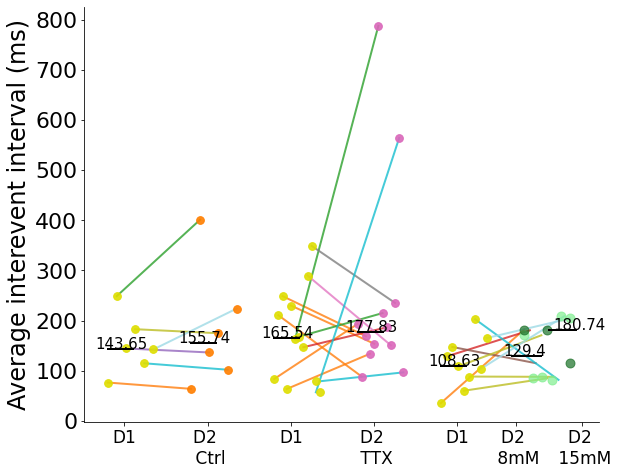

In [79]:

op_color_dict = {}
for h, op in enumerate(df['OP'].unique()):
    op_color_dict[op] = cmap((h+1)/10)

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(1,1,1)
day_label = []

min_h_incubation = str(min(df['hrs_incubation']))
min_amplitude = str(min(df['Average interevent interval (ms)']))[:4]
x_plot = []
for i, comb in enumerate(n_nums.keys()):
    k = 0 + i
    day = comb[:2]
    treatment = comb[3:]
    plot_df = df[(df['treatment'] == treatment) & (df['day'] == day)]
    x = np.linspace(0.8+k, 1.35+k, len(plot_df))
    x_plot.append(x)
    y = plot_df['Average interevent interval (ms)']
    median = np.median(y)
    if treatment == 'high K' and day == 'D2':   
        y_8mm = plot_df['Average interevent interval (ms)'].loc[plot_df['high K concentration'] == '8 mM'] 
        x_8 = np.linspace(0.8+k, 1.35+k, len(y_8mm))
        median_8 = np.median(y_8mm)
        y_15mm = plot_df['Average interevent interval (ms)'].loc[plot_df['high K concentration'] == '15 mM'] 
        x_15 = np.linspace(0.8+k, 1.35+k, len(y_15mm))
        median_15 = np.median(y_15mm)
        ax.scatter(x_8, y_8mm, c = colors[5], s = 80, label = '8 mM high K', alpha = 0.7)
        ax.scatter(x_15, y_15mm, c = colors[7], s = 80, label = '15 mM high K',alpha = 0.7)
        #ax.boxplot(y_8mm, positions = [k+0.65], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[3], alpha = 0.75))
        #ax.boxplot(y_15mm, positions = [k+1.55], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[5], alpha = 0.75))
        ax.plot([0.65+k, 1+k], [median_8, median_8], c = 'k', linestyle = 'solid', linewidth = 2)
        ax.plot([1.1+k, 1.42+k], [median_15, median_15], c = 'k', linestyle = 'solid', linewidth = 2)
        ax.text(k+0.55, median_8 + 0.5, str(round(median_8, 2)), size = 15)
        ax.text(k+1.15, median_15 + 0.5, str(round(median_15, 2)), size = 15)
        #ax.scatter(x, y, alpha = 0.7, s = 40, c = plot_df['K_concentr_bool'], cmap = colormap_K)
    else:
        #ax.boxplot(y, positions = [k + 0.7], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.5))
        y = plot_df['Average interevent interval (ms)']
        ax.scatter(x, y, alpha = 0.9, c = colors[k], s = 60)
        ax.plot([0.8+k, 1.1+k], [median, median], c = 'k', linestyle = 'solid', linewidth = 2)
        ax.text(k+0.65, median + 0.5, str(round(median, 2)), size = 15)
    day_label.append(comb)
    #ax.text(k+0.85, int(np.max(df['Average amplitude (pA)'])+1), 'n = ' + str(n_nums[comb]), size = 12)
    if k in [1,3,5] and data_type == 'repatch':
        for c, cell in enumerate(plot_df['cell_ID_new']):
            x1 = [x_plot[0][c], x[c]] 
            y = df['Average interevent interval (ms)'][df['cell_ID_new'] == cell]
            op = plot_df['OP'][plot_df['cell_ID_new'] == cell].tolist()[0]
            plt.plot(x1, y, '-', color = op_color_dict[op], alpha = 0.8, linewidth = 2, zorder = 0)
        title1 = 'Spontaneous EPSCs (repatch)'
        x_plot = []

#ax.boxplot([[1,4],[2,5],[3,6]], positions=[2,4,5.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(ticks = [1, 2, 3, 4, 5, 5.7, 6.5], labels = ['D1', 
'D2 \n Ctrl', 'D1', 'D2 \n TTX','D1', 'D2 \n 8mM','D2 \n 15mM'], size = 17, zorder = 0)
#ax.set_yticks([5, 10, 15, 20, 25, 30])
ax.tick_params(axis='y', labelsize=22)
ax.set_ylabel('Average interevent interval (ms)', fontsize = 24)

#plt.figlegend(loc = 'upper right',  bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig(save_dir_spontan + '_repatch_spontan_IEI_slice_september_2023.pdf')



In [50]:
spontan_repatch = get_precise_treatment(spontan_repatch)
spontan_df_slice = get_precise_treatment(spontan_df_slice)

In [51]:
# spontan_repatch.to_csv('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/data_tables/spontan_repatch_adult_slice_comparison.csv')
# spontan_df_slice.to_csv('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/data_tables/spontan_adult_slice_comparison.csv')

# PLOT minis

/var/folders/5y/f01m99kn5tx3chk04wp6sc440000gn/T/ipykernel_21434/2816570840.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QC_mini['comment'].loc[mask] = None


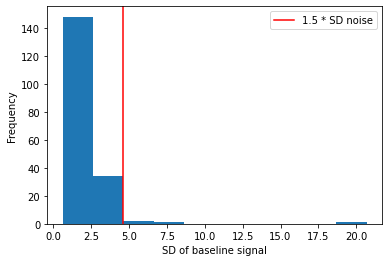

In [18]:
# results_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/meta_events/results/'

# mini_df_orig = pd.read_excel(results_dir + 'mini_all_2023-06-01.xlsx')

# visual_QC_minis = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/notes/analysis/events_detection/minis_rough_evaluation_algorithm_all_results_13.02.2023.xlsx'
# QC_mini = pd.read_excel(visual_QC_minis)
# mask = QC_mini['comment_elaboration'] == 'shifted events peaks'
# QC_mini['comment'].loc[mask] = None

# mini_df = event_funcs.post_event_analysis_main(QC, mini_df_orig, min_event_size = 3, min_hrs = 18) #
# n_nums_minis = event_funcs.get_n_nums_per_day(mini_df)

/var/folders/5y/f01m99kn5tx3chk04wp6sc440000gn/T/ipykernel_17510/2618329040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QC['comment'].loc[mask] = None


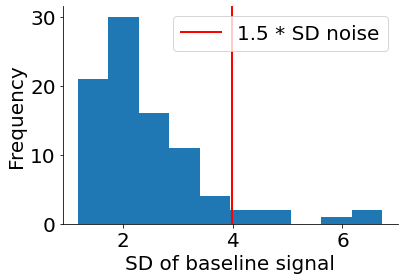

{'D1 Ctrl': 25,
 'D2 Ctrl': 0,
 'D1 TTX': 35,
 'D2 TTX': 0,
 'D1 high K': 22,
 'D2 high K': 0}

In [37]:

minis_updated = pd.read_excel('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/meta_events/results/minis_all_2023-09-05.xlsx')

visual_QC_minis = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/notes/analysis/events_detection/minis_rough_evaluation_algorithm_all_results_13.02.2023.xlsx'
QC = pd.read_excel(visual_QC_minis)
mask = QC['comment_elaboration'] == 'shifted events peaks'
QC['comment'].loc[mask] = None

mini_df = event_funcs.post_event_analysis_main(QC, minis_updated, min_event_size = 1, min_hrs = 30) #
#mini_8mM = event_funcs.remove_high_K_15mM(mini_df)

#n_nums_minis = event_funcs.get_n_nums_per_day(mini_df)

df  = mini_df
n_nums_dict = {}
for tr in treatments:
    for day in days:
        n_nums_dict[day + ' ' + tr] = len(df[(df['day'] == day) & (df['treatment'] == tr)])
n_nums_minis = n_nums_dict
n_nums_minis


In [39]:
exp_overview = pd.read_excel('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/2023-09-20_experiments_overview.xlsx')

dict_higk_K_concentr = {}
for OP in minis_updated['OP'].unique():
    K_concentr = exp_overview['K concentration'][exp_overview['OP'] == OP].tolist()[0]
    dict_higk_K_concentr[OP] = K_concentr

K_concentr_all = []
OP_list = mini_df['OP'].tolist()
for i in range(len(mini_df)):
    OP = OP_list[i]
    K_concentr_all.append(dict_higk_K_concentr[OP])

mini_df['high K concentration'] = K_concentr_all



In [41]:
mini_df = mini_df.loc[mini_df['Average amplitude (pA)'] < 43]


{'D1 Ctrl': 25,
 'D2 Ctrl': 0,
 'D1 TTX': 35,
 'D2 TTX': 0,
 'D1 high K': 22,
 'D2 high K': 0}

In [50]:

n_nums_minis = {'D1 Ctrl': 25,
 'D1 TTX': 35,
 'D1 high K': 22}

In [51]:
df = mini_df
n_nums = n_nums_minis
data_type = 'minis'

In [52]:
mini_df['treatment'].unique()

array(['Ctrl', 'high K', 'TTX'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


median Ctrl  =  12.21266890150226
median TTX  =  12.5026519466206
median15 =  10.619931679697569
median8 =  11.91051550587503


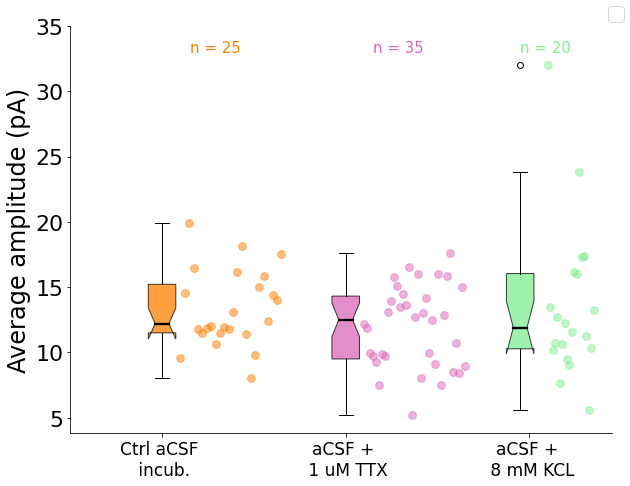

In [59]:
colors = [ '#ff7f00', '#DA67BA', '#7FEE8F','#186F25'] #Ctrl, TTX, 8mM Kcl, 15 mM Kcl

title1 = 'Mini EPSCs in slice'

cmap = plt.cm.get_cmap('tab20')
op_color_dict = {}
for h, op in enumerate(df['OP'].unique()):
    op_color_dict[op] = cmap((h+1)/10)

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(1,1,1)
tr_label = []

min_h_incubation = str(min(df['hrs_incubation']))
min_amplitude = str(min(df['Average amplitude (pA)']))[:4]
x_plot = []
for i, comb in enumerate(n_nums.keys()):
    k = 0 + i

    treatment = comb[3:]
    plot_df = df[df['treatment'] == treatment]
    x = np.linspace(0.8+k, 1.35+k, len(plot_df))
    x_plot.append(x)
    y = plot_df['Average amplitude (pA)']
    median = np.median(y)
    if treatment == 'high K':   
        y_8mm = plot_df['Average amplitude (pA)'].loc[plot_df['high K concentration'] == '8 mM'] 
        x_8 = np.linspace(0.8+k, 1.05+k, len(y_8mm))
        median_8 = np.median(y_8mm)
        y_15mm = plot_df['Average amplitude (pA)'].loc[plot_df['high K concentration'] == '15 mM'] 
        x_15 = np.linspace(1.10+k, 1.35+k, len(y_15mm))
        median_15 = np.median(y_15mm)
        ax.scatter(x_8, y_8mm, alpha = 0.5, c = colors[2], s = 60)
        #ax.scatter(x_15, y_15mm, alpha = 0.5, c = colors[3], s = 60)
        ax.boxplot(y_8mm, positions = [k+0.65], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[2], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        # ax.boxplot(y_15mm, positions = [k+1.55], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[3], alpha = 0.75),
        # medianprops = dict(linewidth=2.3, color = 'k'))
        ax.text(k+0.65, int(np.max(df['Average amplitude (pA)'])+1), 'n = ' + str(len(y_8mm)), size = 15, color = colors[2])
        #ax.text(k+1.15, int(np.max(df['Average amplitude (pA)'])+1), 'n = ' + str(len(y_15mm)), size = 15, color = colors[3])
        print('median15 = ', str(median_15))
        print('median8 = ', str(median_8))
    else:
        ax.boxplot(y, positions = [k + 0.7], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        y = plot_df['Average amplitude (pA)']
        ax.scatter(x, y, alpha = 0.5, c = colors[k], s = 60)
        #ax.plot([0.9+k, 1.1+k], [median, median], c = 'k', linestyle = 'solid', linewidth = 1)
        #ax.text(k+0.85, median + 0.5, str(round(median, 2)), size = 15)
        day_label.append(comb)
        ax.text(k+0.85, int(np.max(df['Average amplitude (pA)'])+1), 'n = ' + str(n_nums[comb]), size = 15,color = colors[k])
        print('median', treatment, ' = ', str(np.median(y)))

#ax.boxplot([[1,4],[2,5],[3,6]], positions=[2,4,5.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(ticks = [0.7, 1.7, 2.7 ], labels = ['Ctrl aCSF \n incub.', 
'aCSF + \n 1 uM TTX', 'aCSF + \n 8 mM KCL'], size = 17)
#plt.title(title1, fontsize = 19, x = 0.5, y = 1)
#ax.set_xlabel('Condition', fontsize = 15)
ax.set_ylabel('Average amplitude (pA)', fontsize = 24)
ax.set_yticks([5,10, 15,20,25,30,35])
ax.tick_params(axis='y', labelsize=22)

plt.figlegend(loc = 'upper right',  bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.patch.set_facecolor('white')

save_folder = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/plots/events/'
plt.savefig(save_folder + 'minis_amp.pdf')


In [103]:
#mini_df_IEI = mini_df.loc[mini_df['Average interevent interval (ms)'] < 1000]
#df = mini_df_IEI
#n_nums = n_nums_minis_no_TTX
#data_type = 'minis'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


median Ctrl  =  146.7616131562295
median TTX  =  137.158466819222
median15 =  237.5679179167262
median8 =  181.017370890942


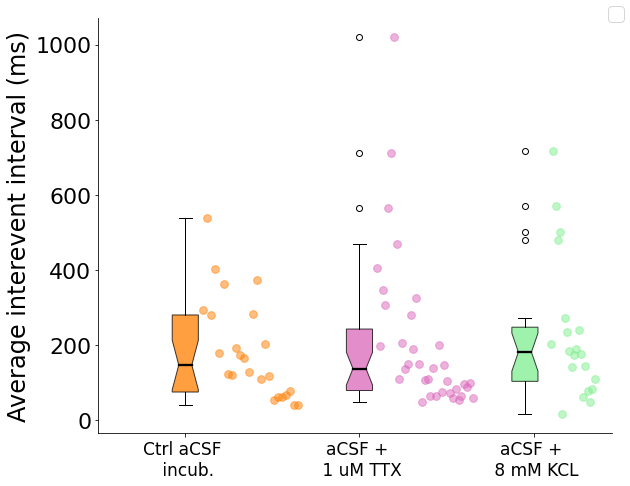

In [60]:

title1 = 'Mini EPSCs in slice'

cmap = plt.cm.get_cmap('tab20')
op_color_dict = {}
for h, op in enumerate(df['OP'].unique()):
    op_color_dict[op] = cmap((h+1)/10)

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(1,1,1)
tr_label = []

min_h_incubation = str(min(df['hrs_incubation']))
min_amplitude = str(min(df['Average interevent interval (ms)']))[:4]
x_plot = []
for i, comb in enumerate(n_nums.keys()):
    k = 0 + i

    treatment = comb[3:]
    plot_df = df[df['treatment'] == treatment]
    x = np.linspace(0.8+k, 1.35+k, len(plot_df))
    x_plot.append(x)
    y = plot_df['Average interevent interval (ms)']
    median = np.median(y)
    if treatment == 'high K':   
        y_8mm = plot_df['Average interevent interval (ms)'].loc[plot_df['high K concentration'] == '8 mM'] 
        x_8 = np.linspace(0.8+k, 1.05+k, len(y_8mm))
        median_8 = np.median(y_8mm)
        y_15mm = plot_df['Average interevent interval (ms)'].loc[plot_df['high K concentration'] == '15 mM'] 
        x_15 = np.linspace(1.10+k, 1.35+k, len(y_15mm))
        median_15 = np.median(y_15mm)
        ax.scatter(x_8, y_8mm, alpha = 0.5, c = colors[2], s = 60)
        #ax.scatter(x_15, y_15mm, alpha = 0.5, c = colors[3], s = 60)
        ax.boxplot(y_8mm, positions = [k+0.65], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[2], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        # ax.boxplot(y_15mm, positions = [k+1.55], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[3], alpha = 0.75),
        # medianprops = dict(linewidth=2.3, color = 'k'))
        print('median15 = ', str(median_15))
        print('median8 = ', str(median_8))
        # ax.text(k+0.65, int(np.max(df['Average interevent interval (ms)'])+1), 'n = ' + str(len(y_8mm)), size = 15, color = colors[1])
        # ax.text(k+1.15, int(np.max(df['Average interevent interval (ms)'])+1), 'n = ' + str(len(y_15mm)), size = 15, color = colors[2])

    else:
        ax.boxplot(y, positions = [k + 0.7], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))
        y = plot_df['Average interevent interval (ms)']
        ax.scatter(x, y, alpha = 0.5, c = colors[k], s = 60)
        #ax.plot([0.9+k, 1.1+k], [median, median], c = 'k', linestyle = 'solid', linewidth = 1)
        #ax.text(k+0.85, median + 0.5, str(round(median, 2)), size = 15)
        day_label.append(comb)
        print('median', treatment, ' = ', str(np.median(y)))
        #ax.text(k+0.85, int(np.max(df['Average interevent interval (ms)'])+1), 'n = ' + str(n_nums[comb]), size = 15,color = colors[k])

#ax.boxplot([[1,4],[2,5],[3,6]], positions=[2,4,5.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(ticks = [0.7, 1.7, 2.7 ], labels = ['Ctrl aCSF \n incub.', 
'aCSF + \n 1 uM TTX', 'aCSF + \n 8 mM KCL'], size = 17)
#plt.title(title1, fontsize = 19, x = 0.5, y = 1)
#ax.set_xlabel('Condition', fontsize = 15)
ax.set_ylabel('Average interevent interval (ms)', fontsize = 24)
#ax.set_yticks([5,10, 15,20,25,30])
ax.tick_params(axis='y', labelsize=22)

plt.figlegend(loc = 'upper right',  bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig(save_folder + 'minis_IEI.pdf')



## PLOT EVENT TRACES

In [4]:
import human_characterisation_functions as hcf
import matplotlib.pyplot as plt
import numpy as np

work_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/data_verji/OP220228/'
fn = '22228025.abf'
chan = [1]

ch1 = hcf.load_traces(work_dir + fn)
ch5 = ch1['Ch1'][0]
sampl_rate, units, times = hcf.get_abf_info(work_dir + fn,1, np.shape(ch1['Ch1'][0])[1], np.shape(ch1['Ch1'][0])[0])

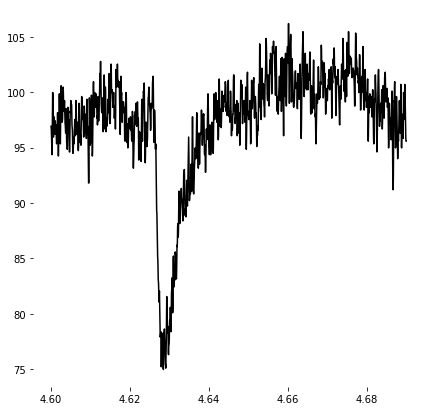

In [7]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax.plot(times[92_000:93_800],ch5[92_000:93_800,0], c = 'k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/plots/legends/spontan_trace.pdf')



# GET DATA FOR STATISTICS

In [64]:
def get_precise_treatment(df):
    high_K_concentr = df['high K concentration'].tolist()
    tr_precise = []
    for i, tr in enumerate(df['treatment']):
        if tr == 'Ctrl':
            tr_precise.append(tr)
        else:
            tr_precise.append(high_K_concentr[i])
    df['treatment'] = tr_precise
    return df

In [65]:
df_intr_props = get_results.collect_intrinsic_df()

adult_df = pl_intr.filter_adult_hrs_incubation_data(df_intr_props, min_age = 15, hrs_inc = 18, max_age = 151) # QC criteria 

adult_df_slice_comparison = adult_df.loc[adult_df['repatch'] == 'no']
adult_df_slice_comparison = adult_df_slice_comparison.loc[adult_df_slice_comparison['treatment'] != 'TTX']
adult_df_slice_comparison = get_precise_treatment(adult_df_slice_comparison)

adult_df_repatch = pl_intr.get_repatch_df(adult_df)
adult_df_repatch = adult_df_repatch.loc[adult_df_repatch['treatment'] != 'TTX']
adult_df_repatch = get_precise_treatment(adult_df_repatch)

/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/plot_intrinsic_props.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cell_ID_new'] = cell_IDs_new
/var/folders/5y/f01m99kn5tx3chk04wp6sc440000gn/T/ipykernel_17510/1314069377.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['treatment'] = tr_precise


In [69]:
adult_df_slice_comparison.to_csv('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/data_tables/adult_slice_comparison.csv')

In [70]:
adult_df_repatch.to_csv('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/data_tables/adult_repatch.csv')

In [72]:
exp_overview = pd.read_excel('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/2023-09-20_experiments_overview.xlsx')

dict_higk_K_concentr = {}
for OP in mini_df_orig['OP'].unique():
    K_concentr = exp_overview['K concentration'][exp_overview['OP'] == OP].tolist()[0]
    dict_higk_K_concentr[OP] = K_concentr

K_concentr_all = []
OP_list = mini_df['OP'].tolist()
for i in range(len(mini_df)):
    OP = OP_list[i]
    K_concentr_all.append(dict_higk_K_concentr[OP])

mini_df['high K concentration'] = K_concentr_all

NameError: name 'mini_df_orig' is not defined

In [57]:
mini_df = mini_df.loc[mini_df['treatment'] != 'TTX']
mini_df = get_precise_treatment(mini_df)

In [74]:
mini_df.to_csv('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/posters/Berlin_neuroscience_meeting_2023/data_tables/minis.csv')

# CONNECTIONS